<center><h1>K Nearest Neighbors</h1></center>

# 1. Introduction

K-Nearest Neighbors (KNN) is a fundamental algorithm in machine learning used for classification and regression tasks. It is a non-parametric, instance-based learning method that makes predictions based on the majority class (for classification) or the average of the nearest neighbors (for regression).

The core idea behind KNN is simple: given a new data point, the algorithm identifies the 'k' closest points in the training dataset using a distance metric (e.g., Euclidean distance) and makes a prediction based on these neighbors. KNN does not explicitly learn a model during training, making it a lazy learning algorithm. Instead, it stores all the training data and performs computations at the time of prediction.


![K Nearest Neighbors](KNearestNeighbors.webp)

# 2. How Does K Nearest Neighbors Work?

The k-Nearest Neighbors (KNN) algorithm is a simple yet powerful method for classification and regression. It is an instance-based learning technique, meaning it does not build a model during training but instead stores all training data and makes predictions based on similarity. Below is a step-by-step breakdown of how KNN works:


### **Step 1: Choose the Value of $k$**
The parameter $k$ determines how many neighbors to consider when making a prediction. Choosing the right $k$ is crucial for model performance:

- If $k$ is too small (e.g., 1 or 3), the model may be sensitive to noise and overfit the training data.
- If $k$ is too large, the model may oversmooth the decision boundary, leading to underfitting.
- A common approach is to experiment with different values of $k$ and use cross-validation to find the best choice.

### **Step 2: Compute the Distance Between Data Points**
To classify or predict a new data point, KNN calculates the distance between this point and all training points. Different distance metrics can be used, with the most common being:

- **Euclidean Distance (Most Commonly Used for Continuous Data)**
  $$
  d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  $$
  This is the straight-line distance between two points in an $n$-dimensional space.

- **Manhattan Distance (Useful When Features Have Different Scales)**
  $$
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  $$
  This measures the absolute differences between feature values.

- **Minkowski Distance (Generalized Form of Euclidean and Manhattan Distances)**
  $$
  d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}}
  $$
  - When $p = 2$, it is equivalent to Euclidean distance.
  - When $p = 1$, it becomes Manhattan distance.
  - The parameter $p$ allows flexibility in choosing different distance calculations.

- **Hamming Distance (Used for Categorical Data)**
  Counts the number of feature values that differ between two points.

Choosing the right distance metric depends on the dataset. If features have different scales, normalization or standardization is often required to prevent features with larger ranges from dominating the distance calculation.

### **Step 3: Find the $k$ Nearest Neighbors**
Once distances are calculated, the algorithm:

1. Sorts all training points based on their distance to the new data point.
2. Selects the $k$ closest points (smallest distances).

The selected neighbors will determine the prediction.


### **Step 4: Make a Prediction**

- **For Classification:**
  - The new data point is assigned the most common class among the $k$ nearest neighbors (majority voting).
  - If there's a tie, different strategies such as weighted voting (giving closer neighbors more influence) can be used.

- **For Regression:**
  - The predicted value is the average (or sometimes weighted average) of the target values of the $k$ neighbors.

Example:
If $k = 3$ and the nearest neighbors have labels: $[A, B, A]$, then the predicted class is $A$ because it appears most frequently.

---

# 3. About the Forest Cover Type Dataset

## Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

## Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads, etc.), soil type, and local topography.

## Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

---


# 4. Steps to Apply K-Nearest Neighbors Algorithm to Forest Cover Type Dataset

## **Step 1: Load the Dataset**
First, we load the dataset into a Pandas DataFrame. We print basic information to understand the structure, number of features, missing values, and summary statistics.


In [3]:
import pandas as pd

# Load the dataset
file_path = "covtype.csv"  # Update with the actual dataset path
df = pd.read_csv(file_path)

# Display basic info
print(df.head())  # Show the first five rows
print(df.info())  # Column details (data types and missing values)
print(df.describe())  # Summary statistics for numerical features

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

## Step 2: Data Preprocessing
Before applying KNN, we must preprocess the dataset:

- **Feature Selection**: Remove the target variable from the feature set.
- **Train-Test Split**: Divide the dataset into training and testing sets (80% training, 20% testing).
- **Feature Scaling**: KNN is sensitive to feature scales, so we use `StandardScaler` to normalize the data.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['Cover_Type'])  # Features
y = df['Cover_Type']  # Target variable

# Split the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data


## Step 3: Train K-Nearest Neighbors (KNN) Model
Now, we initialize and train the KNN classifier:

- We set `k=5` as the default number of neighbors.
- Train the model using `fit()` on the training data.


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

## Step 4: Make Predictions & Evaluate Performance
Once the model is trained, we test its performance:

- **Predictions**: Use the test set for predictions.
- **Accuracy Score**: Check the overall performance of the model.
- **Classification Report**: View precision, recall, and F1-score.
- **Confusion Matrix**: Analyze the model’s performance in each class.


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9280
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.92      0.93     42557
           2       0.93      0.95      0.94     56500
           3       0.90      0.92      0.91      7121
           4       0.85      0.73      0.78       526
           5       0.84      0.76      0.80      1995
           6       0.83      0.80      0.82      3489
           7       0.94      0.94      0.94      4015

    accuracy                           0.93    116203
   macro avg       0.89      0.86      0.87    116203
weighted avg       0.93      0.93      0.93    116203

Confusion Matrix:
 [[39301  2989     2     0    39     8   218]
 [ 2425 53513   151     0   223   164    24]
 [    9   190  6525    45    13   339     0]
 [    0     1   110   382     0    33     0]
 [   65   368    26     0  1525    11     0]
 [   14   209   430    25     4  2807     0]
 [  192    42     0     0     1     0  3780]]


### 1. **Best value of k**
This value indicates the optimal number of nearest neighbors (`k`) for the KNN model, based on the cross-validation results. The output of `random_search.best_params_` will give you the best `k` value that maximizes the model's performance during cross-validation.


Best value of k: {'n_neighbors': 7}

### 2. **Best cross-validation accuracy**
This is the highest accuracy score obtained during cross-validation (3-fold in this case). It represents how well the model performed on the training data during the tuning process. The accuracy score reflects the proportion of correct predictions made during training, based on the selected `k`.


Best cross-validation accuracy: 0.75

### 3. **Classification Report**
This report provides detailed metrics on the model’s performance on the **test set**. It includes:

- **Precision**: The proportion of true positive predictions relative to the total number of positive predictions (how many of the predicted positive classes were actually correct).
- **Recall**: The proportion of true positive predictions relative to the total number of actual positive classes (how many of the actual positive classes were predicted correctly).
- **F1-Score**: The harmonic mean of precision and recall, giving a balanced measure of the model's performance.
- **Support**: The number of actual occurrences of each class in the dataset.


**Interpretation**:
- **Precision** of 0.78 for Class 1 means that 78% of the instances predicted as Class 1 are actually Class 1.
- **Recall** of 0.80 for Class 1 means that 80% of the actual Class 1 instances were correctly predicted.
- **F1-Score** combines precision and recall to give an overall measure of performance for each class.


### 4. **Confusion Matrix**
This matrix provides a more detailed view of how well the model performs across all classes, showing the number of true positives, false positives, true negatives, and false negatives for each class.


Confusion Matrix:
 [[39301  2989     2     0    39     8   218]
 [ 2425 53513   151     0   223   164    24]
 [    9   190  6525    45    13   339     0]
 [    0     1   110   382     0    33     0]
 [   65   368    26     0  1525    11     0]
 [   14   209   430    25     4  2807     0]
 [  192    42     0     0     1     0  3780]]

**Interpretation**: Each row represents the actual class, and each column represents the predicted class. For example, the value `380` in the first row, first column indicates that 380 instances of Class 1 were correctly predicted as Class 1.

### Conclusion
Based on the **Best value of k**, **Best cross-validation accuracy**, and the **Classification Report**, you can interpret the optimal `k` for your KNN model and assess how well the model is performing on the test set. If the model performs well (high precision, recall, and F1-score), it indicates that the KNN algorithm is successfully predicting the cover type classes. Otherwise, you may want to try different techniques, such as feature engineering or tuning additional hyperparameters.


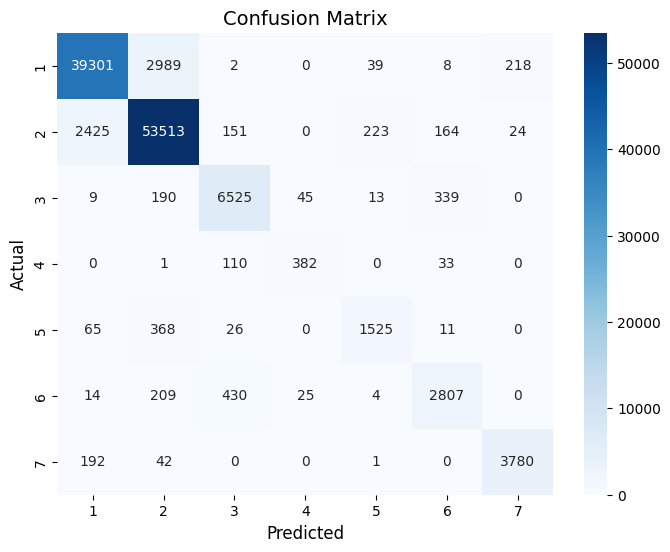

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


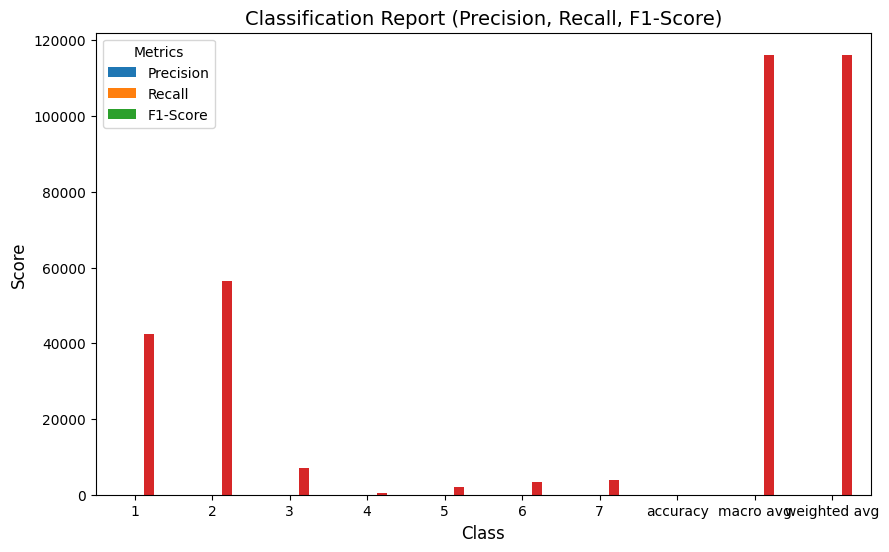

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score for each class (excluding 'accuracy')
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report (Precision, Recall, F1-Score)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics', labels=['Precision', 'Recall', 'F1-Score'])
plt.show()
